## Linear Regression Assignment - Mohammed Suleman

- Problem Statement : A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

#### Analysing the raw data

- For analysing the data, using it for linear relationships and correlation we import the necessary libraries, read and check the datatypes

In [1]:
# Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Import warnings in order to analyse the linear relationship:
import warnings
warnings.filterwarnings('ignore')

- Read the data

In [3]:
# Read the data:
b_s = pd.read_csv("day.csv")
b_s.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# After the data is read, determine the shape of the data
b_s.shape

(730, 16)

- There are 730 rows and 16 columns in the given data

In [5]:
# Understand the data by checking whether it is integer or object
b_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Understand the data by checking the numerical data and finding out the standard deviation, mean, minimum and maximum:
b_s.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Analyse the size of the data and column
b_s.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
b_s.size

11680

- The size of the data is 11680

In [9]:
#Check the axes of the data
b_s.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [10]:
# Check whether there are any null values present.
b_s.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- As we can see, that there are no null values present in the data.
- So we don't need to remove any unnecessary data.

In [11]:
# As there are no null values present, we can check the values of the from the data:
b_s.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [12]:
#  From the values present in the data, we have to check the number of dimensions in the data
b_s.ndim

2

#### As for now, the data is analysed in basic ways, we can now clean the data by dropping some columns which are irrelevant to the data

In [13]:
# Data Cleaning:
# Analyse the data by understanding which column can be dropped:
b_s.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- From understanding the data, we can see that columns 'dteday','casual','registered' and 'instant' can be dropped because we have the required data for linear analysis and correlation purposes and some columns have nothing to do with the target.

In [14]:
# Dropping the columns:
b_s.drop(['dteday'], axis=1, inplace=True)
b_s.drop(['instant'], axis=1, inplace=True)
b_s.drop(['casual'], axis=1, inplace=True)
b_s.drop(['registered'], axis=1, inplace=True)

In [15]:
b_s.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
b_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [17]:
b_s.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
# By using correlation we can find the correlation between all columns
b_s.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


In [19]:
#By calculating the value_counts function for others such as weekday, weathersit and workingday
b_s.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [20]:
b_s.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
b_s.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [22]:
# From the above data, by counting the values we can see that eventhough they are non-null category all are integers.
b_s.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### There are no null or missing values present in the data.

In [23]:
# Now we need to check the outliers of the data:
# But before that we need to check the unique values first:
b_s.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

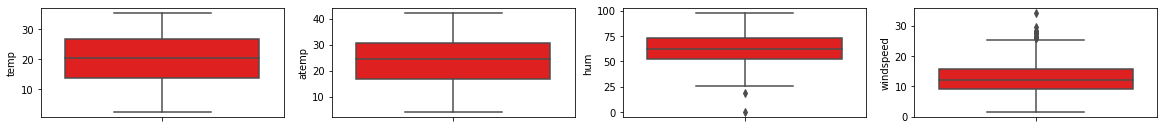

In [24]:
# For the continous variables we need to check the data by finding the outliers:
cont_out = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(20,2))

i = 1
for cont_out in cont_out:
    plt.subplot(1,4,i)
    sns.boxplot(y=cont_out,color='red', data=b_s)
    i+=1

In [25]:
# From the data, we can see that outliers are present in hum and windspeed.
b_s.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
# Now it is better to replace the numerical values with categorical values for representing the data in an easy wasy bu using EDA
# Exploratory Data Analysis:
b_s.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

b_s.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

b_s.mnth = b_s.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

b_s.weekday = b_s.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
b_s.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
b_s

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,fri,1,moderate,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,sat,0,moderate,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,sun,0,moderate,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,mon,1,good,10.489153,11.58500,48.3333,23.500518,1796


#### Now we can see clearly that all the values are replaced and it'll be easy for visualization and analysation.
#### With respect respect to the boxplot plotted for 'temp', 'atemp', 'hum' and 'windspeed' we use the pairplot to find the linear relationship

<Figure size 1440x2160 with 0 Axes>

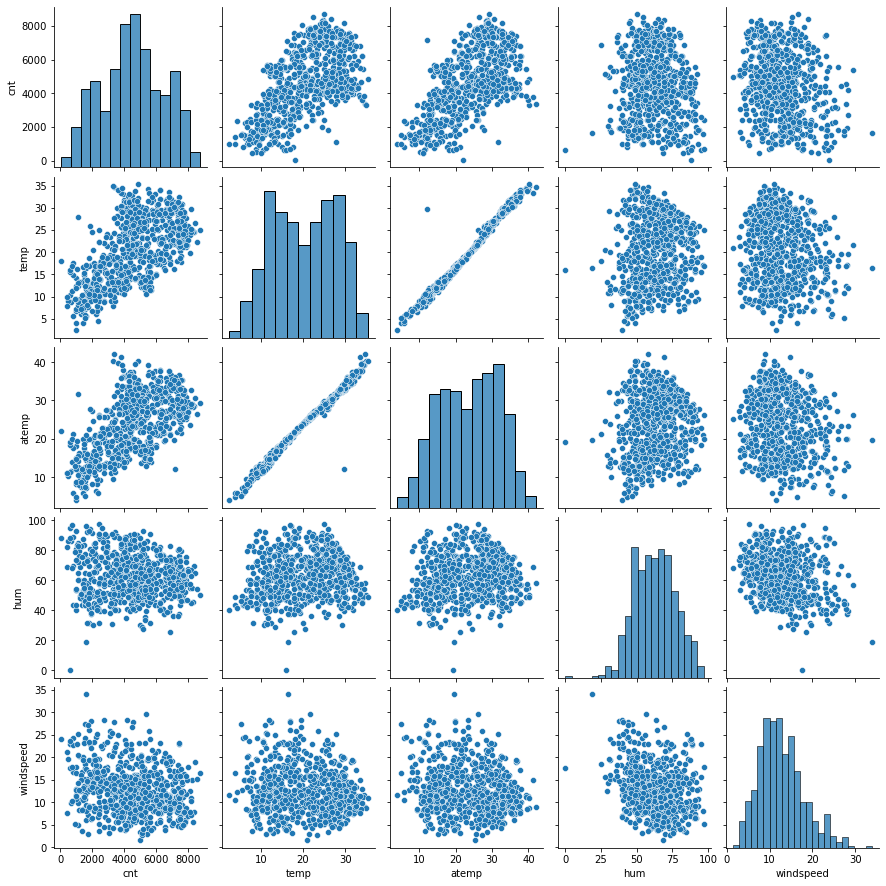

In [37]:
plt.figure(figsize = (20,30))
sns.pairplot(data=b_s,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### From the above data, we can clearly infer that temp and atemp have the highest correlation with the respect to the target variable 'cnt'.

#### Now that the boxplotted data is analysed and plotted using pairplot now it is time to analyse the overall data using pairplot to verify the correlation between the numerical values.

<Figure size 1440x2160 with 0 Axes>

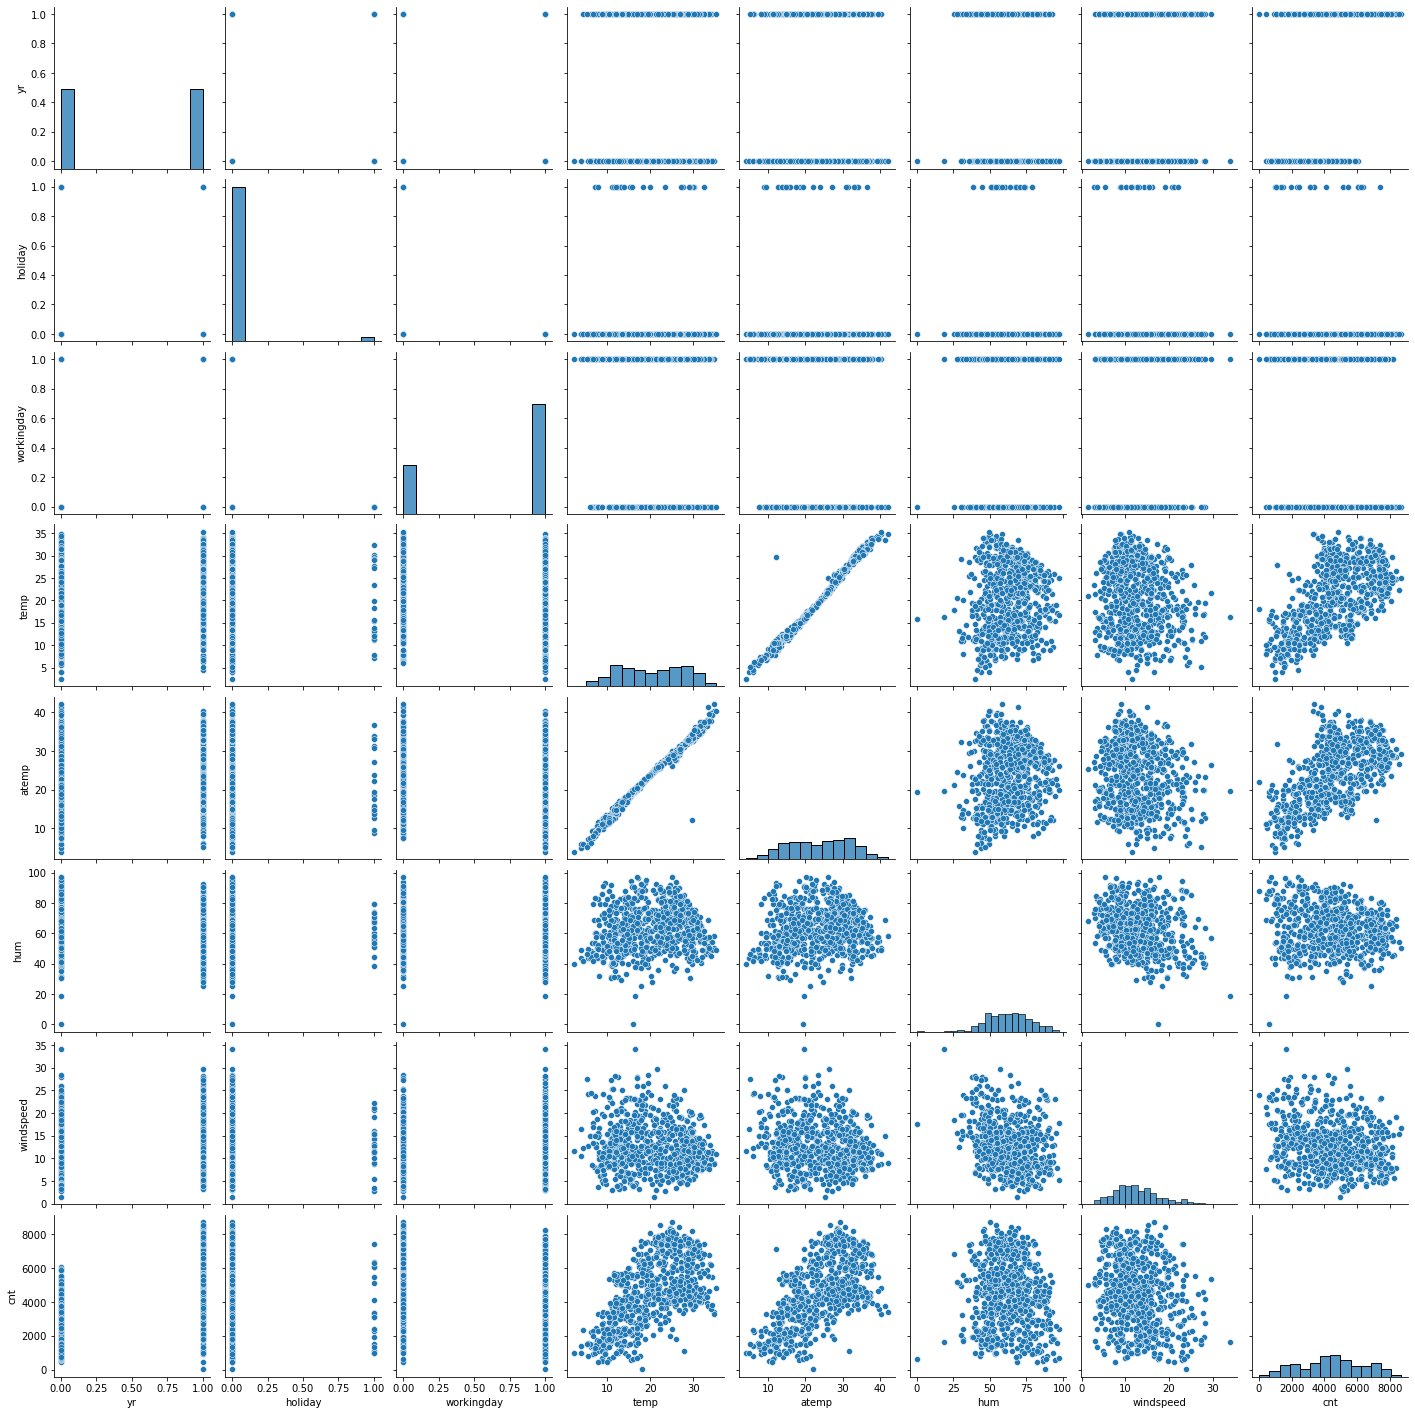

In [38]:
plt.figure(figsize = (20,30))
sns.pairplot(data = b_s)
plt.show()

#### By this plot it is a bit difficult to analyse the correlation between the numerical values. Hence we do a heatmap which is way more efficient in measuring the correlation for continous variables such as 'cnt', 'temp', 'atemp', 'hum' and 'windspeed'

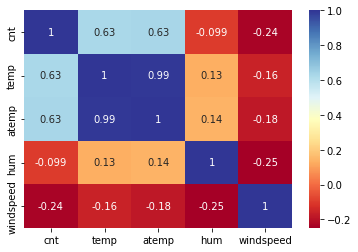

In [40]:
sns.heatmap(b_s[['cnt', 'temp', 'atemp', 'hum','windspeed']].corr(),cmap='RdYlBu',annot = True)
plt.show()

#### We can infer from the heatmap that temp and atemp have a correlation of almost '0.99' which is almost equal to '1'. 
#### This states that the variable atemp has been derived form the variables temp.

In [41]:
b_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


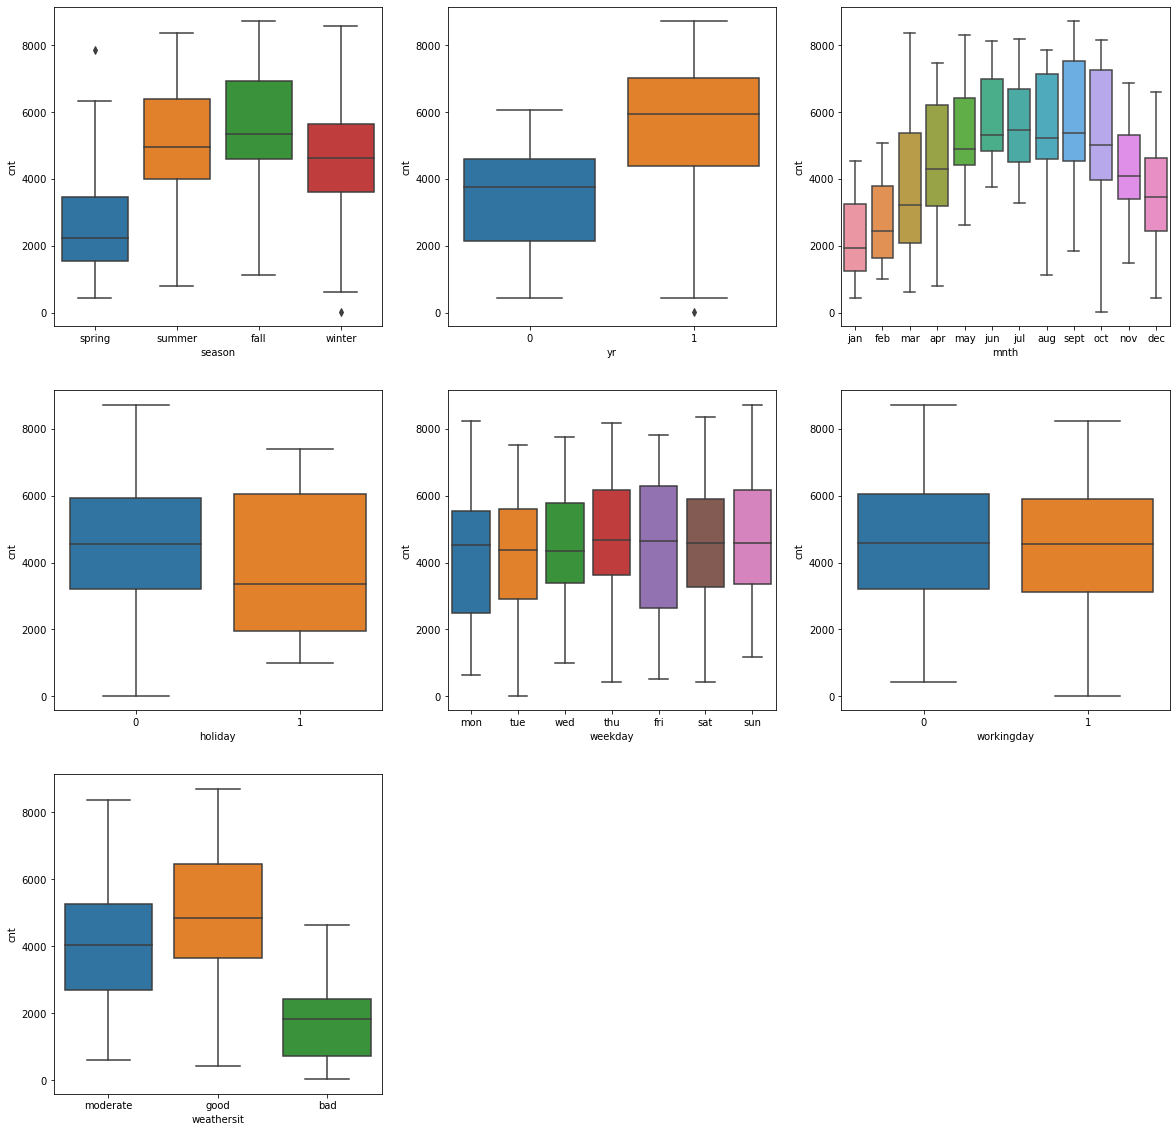

In [42]:
### As the numerical values are analysed, we can infer the data for the categorical variables with target variables:
categorical_target_variables = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20,20))
for i in enumerate(categorical_target_variables):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=b_s, x=i[1], y='cnt')
plt.show()

### From the above data we can infer the follows :
-  The demand for bikes on the highest season is during the fall season.
-  From all the data we can clearly analyse that there is an increase in demand for bikes.
-  During the holiday and weekend there is a decrease in demand so it can be omitted.  
-  Most of the working days show mostly the same demand.
-  During a weekday when the weather is in bad condition the rent for the building is likely to be reduced.

#### Now the demand for the bikes is known, now it is ready to find the relation between temp,humidity and Windspeeed with respect to the target variable 'cnt'

- Relation between temperature and cnt:

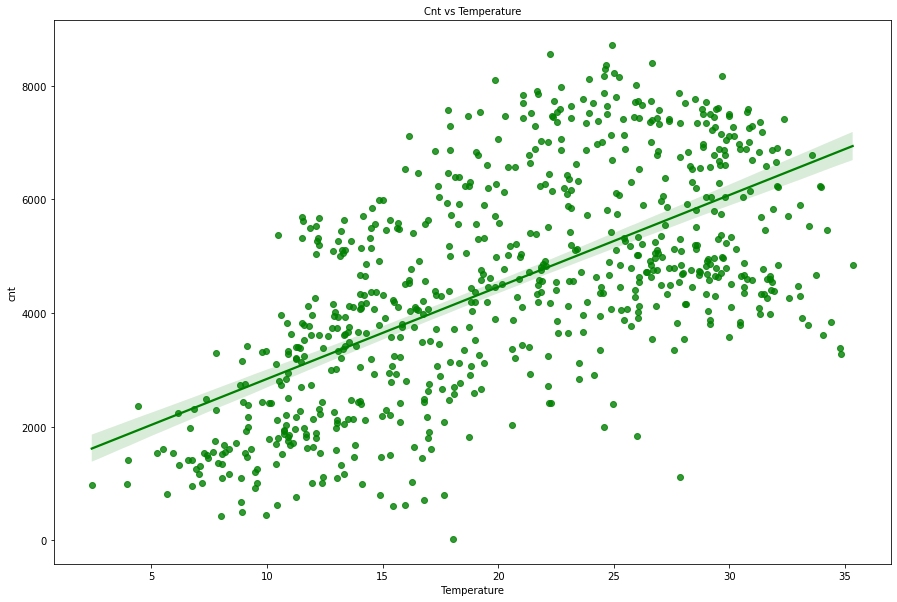

In [46]:
plt.figure(figsize=(15,10))
plt.title("Cnt vs Temperature",fontsize=10)
sns.regplot(data=b_s,y="cnt",x="temp",color='Green')
plt.xlabel(" Temperature ")
plt.show()

##### From the graph we can see that demand is liekly to go high.

- Relation between humidity and cnt:

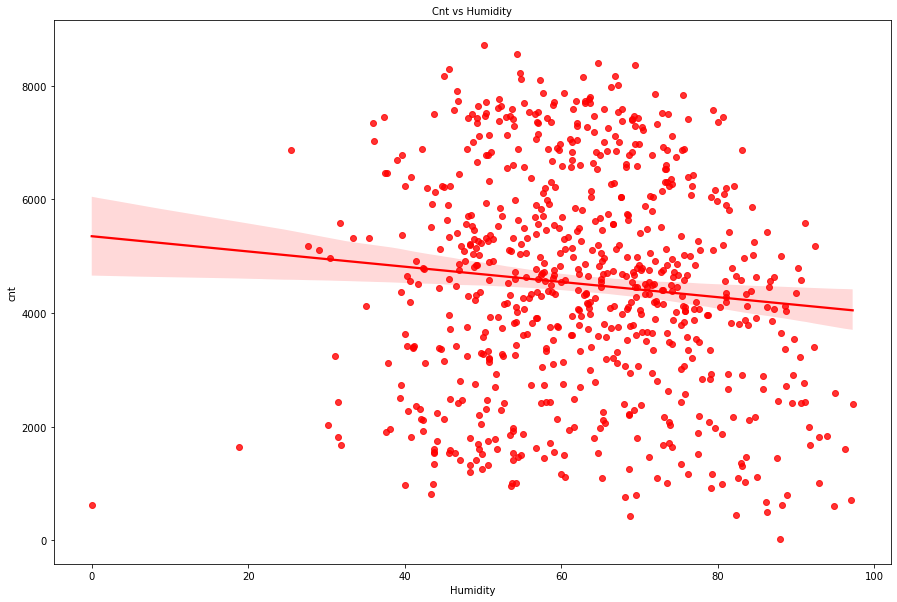

In [47]:
plt.figure(figsize=(15,10))
plt.title("Cnt vs Humidity",fontsize=10)
sns.regplot(data=b_s,y="cnt",x="hum",color="Red")
plt.xlabel("Humidity")
plt.show()

##### From the graph we can see that demand is liekly to go less.

- Relation between Windspeed and cnt:

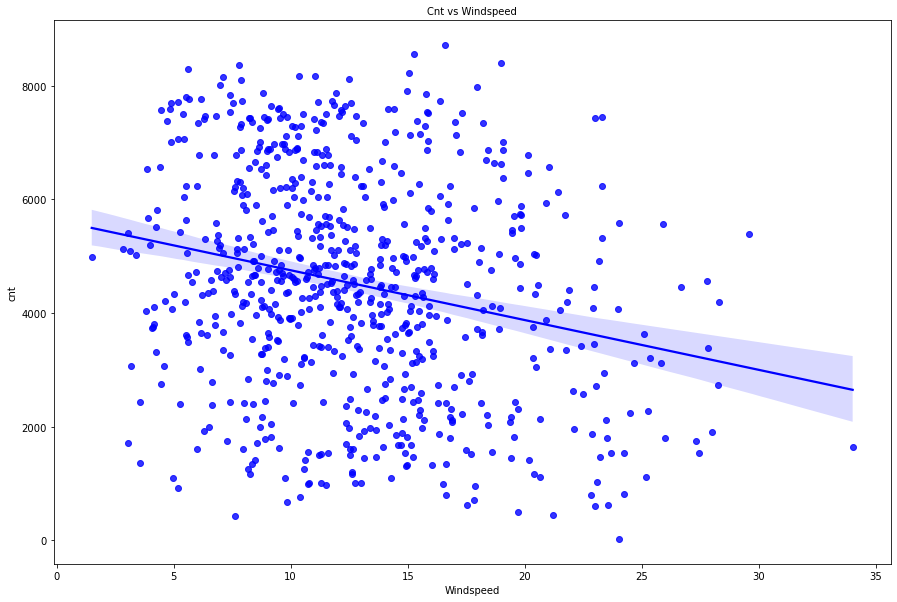

In [49]:
plt.figure(figsize=(15,10))
plt.title("Cnt vs Windspeed",fontsize=10)
sns.regplot(data=b_s,y="cnt",x="windspeed",color="Blue")
plt.xlabel("Windspeed")
plt.show()

##### From the graph we can clearly state that the demand is going very low.

- Now that demand is known for continous variables it is ready to determine the linear regression by creating dummy variables for the categorical variables.

### Linear Regression

- Creation of dummy variables for categorical values such as "season","mnth","weekday" and "weathersit":-

In [50]:
b_s = pd.get_dummies(data=b_s,columns=["season","mnth","weekday"],drop_first=True)
b_s = pd.get_dummies(data=b_s,columns=["weathersit"])

In [51]:
# Lets check what the columns are present in the data after adding the dummies:
b_s.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [52]:
# Lets check the data:
b_s.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


### Now that the data is created by using dummies it is all set on building the model for the data

#### Building the Model for the data:

In [53]:
# Check the rows and columns of the data:
b_s.shape

(730, 31)

##### Lets proceed to create variables such as 'X' and 'Y' for training and testing the data by first spliting the data:

In [100]:
#Using the random function train and test data is split into 70:30 ratio
np.random.seed(0)
b_s_train,b_s_test=train_test_split(b_s,train_size=0.7,test_size=0.3,random_state=1000)

In [102]:
print(b_s_train.shape)
print(b_s_test.shape)

(510, 31)
(219, 31)


In [103]:
b_s_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
544,1,0,0,34.200847,39.33065,48.8750,11.082939,5463,0,0,...,0,0,1,0,0,0,0,0,1,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,...,0,0,0,0,0,0,1,0,1,0
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,0,1,...,0,0,0,0,0,1,0,0,0,1
176,0,0,1,27.880000,31.88145,51.3333,6.333731,5305,0,0,...,0,0,0,0,0,1,0,0,1,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
b_s_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
310,0,0,1,16.195000,20.04355,75.8750,3.834075,4035,0,0,...,0,0,0,0,0,0,1,0,1,0
320,0,0,0,14.008347,16.16105,57.5833,20.459254,3053,0,0,...,0,0,1,0,0,0,0,0,0,1
189,0,0,1,30.066653,33.20790,60.9167,11.250104,5336,0,0,...,0,1,0,0,0,0,0,0,1,0
382,1,0,1,12.436653,13.76270,44.3333,27.833743,3376,1,0,...,0,0,0,0,0,0,0,0,1,0
388,1,0,1,14.042500,17.45540,83.5833,8.292389,4339,1,0,...,0,0,0,0,1,0,0,0,1,0


In [105]:
b_s_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 544 to 599
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    int64  
 8   season_spring        510 non-null    uint8  
 9   season_summer        510 non-null    uint8  
 10  season_winter        510 non-null    uint8  
 11  mnth_aug             510 non-null    uint8  
 12  mnth_dec             510 non-null    uint8  
 13  mnth_feb             510 non-null    uint8  
 14  mnth_jan             510 non-null    uint8  
 15  mnth_jul             510 non-null    u

In [106]:
b_s_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   hum                  219 non-null    float64
 6   windspeed            219 non-null    float64
 7   cnt                  219 non-null    int64  
 8   season_spring        219 non-null    uint8  
 9   season_summer        219 non-null    uint8  
 10  season_winter        219 non-null    uint8  
 11  mnth_aug             219 non-null    uint8  
 12  mnth_dec             219 non-null    uint8  
 13  mnth_feb             219 non-null    uint8  
 14  mnth_jan             219 non-null    uint8  
 15  mnth_jul             219 non-null    u

### Scaling continuos variables :
#### The purpose is after creting the model for linear regression analysis it is better to analyse the continous variables by importing other models

In [88]:
# Importing additional libraries:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm 

In [108]:
# Lets start scaling the variables which are continous variables :
c_n_v = ['temp','atemp','hum','windspeed']

In [107]:
scaling = MinMaxScaler()

In [114]:
b_s_train[c_n_v] = scaling.fit_transform(b_s_train[c_n_v])

In [115]:
# By using describe function we can anaylyse the min, max and standard deviation of the data
b_s_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.682353,0.522749,0.507177,0.650813,0.347478,4492.794118,0.24902,0.266667,...,0.068627,0.143137,0.149020,0.147059,0.131373,0.145098,0.141176,0.027451,0.625490,0.347059
std,0.500491,0.157763,0.466018,0.239351,0.219530,0.145303,0.161325,1912.405515,0.43287,0.442651,...,0.253068,0.350557,0.356457,0.354512,0.338139,0.352545,0.348545,0.163554,0.484471,0.476502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,3214.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,4489.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,5902.500000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
# Dividing into X and Y factor for training, testing and model building
y_train = b_s_train.pop('cnt')
X_train = b_s_train

In [117]:
# Check the shape of both the data
y_train.shape

(510,)

In [118]:
X_train.shape

(510, 30)

In [119]:
# Now we use RFE and statsmodel method combined for optimum model
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [123]:
rfe = RFE(Lr)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [124]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 7),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 16),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 5),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 4),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 9),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 14),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 10),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [125]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [126]:
X_train.columns[~rfe.support_]

Index(['holiday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [127]:
# We select the respective columns by creating the selected variables
X_train_rfe = X_train[col]

In [129]:
# Now to check what are the columns present in it
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [130]:
X_train_rfe.shape

(510, 15)

##### Now we know that are 15 rows as selected variables for RFE which can now be used for building the model

### BUILD : MODEL - 1

#### Variance Inflation Factor

In [131]:
#Calculating the VIF value by entering the respective data created and sorting it from the highest order
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_good,70.69
2,temp,53.12
3,atemp,51.82
14,weathersit_moderate,46.67
1,workingday,10.55
10,weekday_sat,6.86
11,weekday_sun,6.79
12,weathersit_bad,5.18
6,season_spring,2.63
4,hum,1.92


##### The model can now be created using statsmodel, adding constant variables to it an by also running a linear model

In [135]:
X_train_linear_m1 = sm.add_constant(X_train_rfe)
lr_model1=sm.OLS(y_train,X_train_lm1).fit()
print(lr_model1.summary())
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.8
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          9.50e-181
Time:                        19:40:28   Log-Likelihood:                -4123.5
No. Observations:                 510   AIC:                             8277.
Df Residuals:                     495   BIC:                             8340.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1016.6629    

,Features,VIF
13,weathersit_good,70.69
2,temp,53.12
3,atemp,51.82
14,weathersit_moderate,46.67
1,workingday,10.55
10,weekday_sat,6.86
11,weekday_sun,6.79
12,weathersit_bad,5.18
6,season_spring,2.63
4,hum,1.92


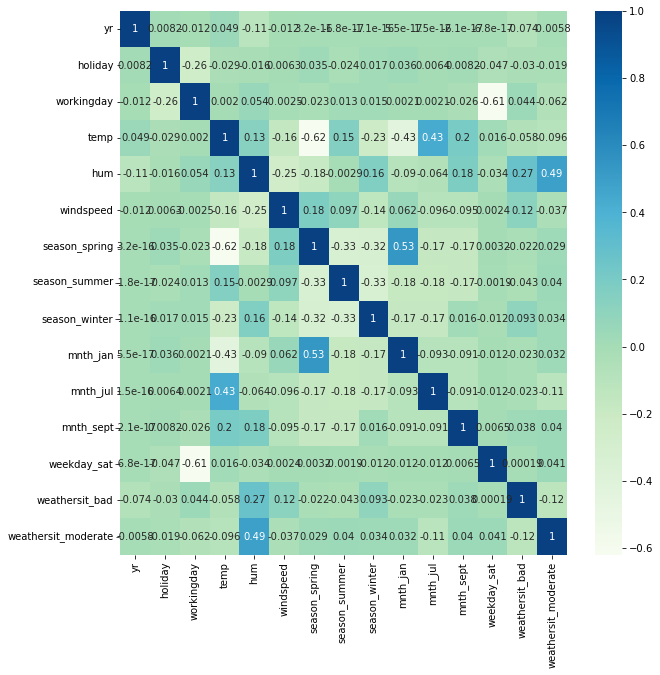

In [136]:
# By creating a heatmap we can find the correlation between all the variables.
plt.figure(figsize = (10,10))
sns.heatmap(b_s[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

### BUILD MODEL - 2

In [137]:
# Next model is created by dropping humidity column due to high VIF.

X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)

In [143]:
#Calculating the VIF value by entering the respective data created and sorting it from the highest order
vif_2=pd.DataFrame()
vif_2['Features']=X_train_rfe2.columns
vif_2['VIF_2']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif_2['VIF_2'] = round(vif['VIF'], 2)
vif_2 = vif_2.sort_values(by = "VIF_2", ascending = False)
vif_2

,Features,VIF_2
13,weathersit_moderate,70.69
2,temp,53.12
3,atemp,51.82
1,workingday,10.55
10,weekday_sun,6.86
11,weathersit_bad,6.79
12,weathersit_good,5.18
6,season_winter,2.63
4,windspeed,1.92
7,mnth_jul,1.73


##### The model can now be created using statsmodel, adding constant variables to it an by also running a linear model

In [141]:
X_train_linear_m2 = sm.add_constant(X_train_rfe2)
lr_m2=sm.OLS(y_train,X_train_linear_m2).fit()
print(lr_m2.summary())
vif_2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.2
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          7.70e-178
Time:                        19:50:21   Log-Likelihood:                -4133.1
No. Observations:                 510   AIC:                             8294.
Df Residuals:                     496   BIC:                             8353.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 199.6780    

,Features,VIF_2
13,weathersit_moderate,70.69
2,temp,53.12
3,atemp,51.82
1,workingday,10.55
10,weekday_sun,6.86
11,weathersit_bad,6.79
12,weathersit_good,5.18
6,season_winter,2.63
4,windspeed,1.92
7,mnth_jul,1.73


### BUILD - MODEL 3

In [145]:
# Next model is created seson_spring is dropped as it has the highest VIF value
X_train_rfe3=X_train_rfe2.drop(['season_spring'],axis=1)

#Calculating the VIF value by entering the respective data created and sorting it from the highest order
vif_3=pd.DataFrame()
vif_3['Features']=X_train_rfe3.columns
vif_3['VIF_3']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif_3['VIF_3']=round(vif["VIF"],2)
vif_3 = vif.sort_values(by = "VIF", ascending = False)
vif_3

,Features,VIF
13,weathersit_good,70.69
2,temp,53.12
3,atemp,51.82
14,weathersit_moderate,46.67
1,workingday,10.55
10,weekday_sat,6.86
11,weekday_sun,6.79
12,weathersit_bad,5.18
6,season_spring,2.63
4,hum,1.92


##### The model can now be created using statsmodel, adding constant variables to it an by also running a linear model

In [148]:
X_train_linear_m3=sm.add_constant(X_train_rfe3)
lr_m3=sm.OLS(y_train,X_train_linear_m3).fit()
print(lr_m3.summary())
vif_3

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     171.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          7.55e-168
Time:                        20:06:56   Log-Likelihood:                -4159.6
No. Observations:                 510   AIC:                             8345.
Df Residuals:                     497   BIC:                             8400.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -668.4701    

,Features,VIF
13,weathersit_good,70.69
2,temp,53.12
3,atemp,51.82
14,weathersit_moderate,46.67
1,workingday,10.55
10,weekday_sat,6.86
11,weekday_sun,6.79
12,weathersit_bad,5.18
6,season_spring,2.63
4,hum,1.92


### BUILD - MODEL 4

In [149]:
# Next model is created workingday column is dropped due to high VIF value
X_train_rfe4=X_train_rfe3.drop(['workingday'],axis=1)

#Calculating the VIF value by entering the respective data created
vif_4=pd.DataFrame()
vif_4['Features']=X_train_rfe4.columns
vif_4['VIF_4']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif_4['VIF_4']=round(vif['VIF'],2)
vif_4

,Features,VIF_4
0,yr,1.02
1,temp,10.55
2,atemp,53.12
3,windspeed,51.82
4,season_winter,1.92
5,mnth_jul,1.21
6,mnth_sept,2.63
7,weekday_sat,1.73
8,weekday_sun,1.31
9,weathersit_bad,1.11


In [151]:
X_train_linear_m4=sm.add_constant(X_train_rfe4)
lr_m4=sm.OLS(y_train,X_train_linear_m4).fit()
print(lr_m4.summary())
vif_4

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     180.4
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          9.09e-166
Time:                        20:14:18   Log-Likelihood:                -4167.2
No. Observations:                 510   AIC:                             8358.
Df Residuals:                     498   BIC:                             8409.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  56.0388    

,Features,VIF_4
0,yr,1.02
1,temp,10.55
2,atemp,53.12
3,windspeed,51.82
4,season_winter,1.92
5,mnth_jul,1.21
6,mnth_sept,2.63
7,weekday_sat,1.73
8,weekday_sun,1.31
9,weathersit_bad,1.11


### BUILD - MODEL 5

In [152]:
# Next model is created dropping 'weekday_sat' due to high p-value
X_train_rfe5=X_train_rfe4.drop(['weekday_sat'],axis=1)

# Calculate the VIF value
vif_5=pd.DataFrame()
vif_5['Features']=X_train_rfe5.columns
vif_5['VIF_5']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif_5['VIF_5']=round(vif['VIF'],2)
vif_5

,Features,VIF_5
0,yr,1.02
1,temp,10.55
2,atemp,53.12
3,windspeed,51.82
4,season_winter,1.92
5,mnth_jul,1.21
6,mnth_sept,2.63
7,weekday_sun,1.73
8,weathersit_bad,1.31
9,weathersit_good,1.11


In [153]:
X_train_linear_m5=sm.add_constant(X_train_rfe5)
lr_m5=sm.OLS(y_train,X_train_linear_m5).fit()
print(lr_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     198.0
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.32e-166
Time:                        20:21:28   Log-Likelihood:                -4168.0
No. Observations:                 510   AIC:                             8358.
Df Residuals:                     499   BIC:                             8405.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  70.8650    

### BUILD - MODEL 6

In [155]:
# Next model is created by dropping atemp as it has high p value
X_train_rfe6=X_train_rfe5.drop(['atemp'],axis=1)

# Calculate the VIF value
vif_6=pd.DataFrame()
vif_6['Features']=X_train_rfe6.columns
vif_6['VIF_6']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif_6['VIF_6']=round(vif['VIF'],2)
vif_6

,Features,VIF_6
0,yr,1.02
1,temp,10.55
2,windspeed,53.12
3,season_winter,51.82
4,mnth_jul,1.92
5,mnth_sept,1.21
6,weekday_sun,2.63
7,weathersit_bad,1.73
8,weathersit_good,1.31
9,weathersit_moderate,1.11


In [156]:
X_train_linear_m6=sm.add_constant(X_train_rfe6)
lr_m6=sm.OLS(y_train,X_train_linear_m6).fit()
print(lr_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     220.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.06e-167
Time:                        20:30:25   Log-Likelihood:                -4168.2
No. Observations:                 510   AIC:                             8356.
Df Residuals:                     500   BIC:                             8399.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  95.9067    

**Insights:**
- The Model 6 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.
- The R-squared and Adj. R-squared looks very good at 0.799 and 0.795 respectively.
- F-static is also large about a value of 220.3, stating a good fit of model.
- We will check the test data metrics to check whether this model is significant enough or not.

#### RESIDUAL ANALYSIS:
- By residual analysis we can determine whether the data is significant or not.

In [157]:
y_train_cnt = lr_m6.predict(X_train_linear_m6)

Text(0.5, 0, 'Errors')

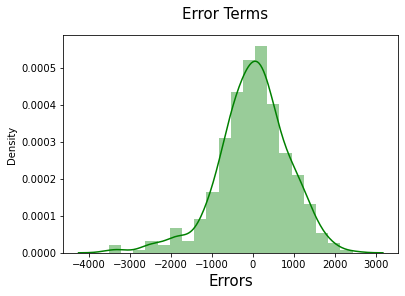

In [164]:
# The residual value is the difference between the linear model value and the y train value.
residual = y_train-y_train_cnt

# We plot a histogram in order to validate the error terms
fig = plt.figure()
sns.distplot((residual), bins = 20,color="Green")
fig.suptitle('Error Terms', fontsize = 15)                   
plt.xlabel('Errors', fontsize = 15)

**Inference:**
- Therefore we can state that the residuals are normally distributed and hence the linear regression is valid.

#### Find the R-Squared Value:

In [162]:
r2_score(y_train,y_train_cnt)

0.7985798766871255

- The R-Squared value is almost same as the final model.

##### Final Model Evaluation:


In [163]:
print(lr_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     220.3
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          1.06e-167
Time:                        20:47:59   Log-Likelihood:                -4168.2
No. Observations:                 510   AIC:                             8356.
Df Residuals:                     500   BIC:                             8399.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  95.9067    

**Final Assesment:**
- September month is the best time to expand the industry and the sales.
- During good weather, the demand and sales of bike will increase which profits the industry
- But avoiding sales and demand during bad weather is better because during bad climatic conditions sales and demand would result in loss.
- Month of July is not the best time for expanding the sales and industry.